In [12]:
import os
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
#----------------------------------------------------
from sklearn.model_selection import cross_val_score,train_test_split, KFold,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import PredictionErrorDisplay as PED
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
#-------------------------

In [13]:
#os.environ["OMP_NUM_THREADS"]="1"
#os.environ["OPENBLAS_NUM_THREADS"]="1"
#os.environ[""]="16"

In [14]:
X=pd.read_pickle("./calc_descriptors_final.pkl")
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,MolWt,NumRadicalElectrons,FpDensityMorgan1,AvgIpc,BalabanJ,HallKierAlpha,...,fr_allylic_oxid,fr_amide,fr_aniline,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_ketone,fr_para_hydroxylation,fr_piperdine
0,13.421670,1.813652,-4.213449,93.904762,292.287,0,1.666667,3.203010,2.128362,-1.40,...,0,0,0,0,4,2,3,0,0,0
1,14.938999,0.626931,-6.373747,66.444444,660.651,0,1.377778,3.295038,3.117964,-3.23,...,2,0,0,0,0,2,6,2,0,0
2,15.674552,1.517576,-4.913705,45.409091,598.604,0,0.886364,3.352137,1.857894,-4.67,...,1,0,0,0,6,1,5,2,0,0
3,15.162100,1.184590,-4.773941,45.804878,554.551,0,1.048780,3.323824,1.856690,-4.47,...,1,0,0,0,6,1,3,2,0,0
4,14.690159,1.393863,-6.473465,57.538462,534.693,0,0.948718,3.304427,2.630768,-3.15,...,0,0,0,0,1,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379431,14.867353,0.241020,-4.250377,48.218750,441.958,0,1.000000,3.247815,1.923121,-2.91,...,0,2,1,0,0,0,0,0,0,0
379432,13.317229,0.796810,-3.961122,27.363636,298.294,0,1.500000,3.008406,2.563076,-2.69,...,4,0,0,0,0,0,1,2,0,0
379433,14.428131,0.687438,-5.362506,22.894737,1406.844,0,0.539474,0.720333,1.821806,-4.93,...,0,4,0,0,0,0,0,0,0,0
379434,12.438990,0.806168,-4.833711,53.297297,523.467,0,1.243243,3.198133,2.348013,-3.91,...,2,0,0,0,1,1,4,0,0,0


In [15]:
print(list(X.max()),list(X.min()))

[22.09648419252851, 6.578125, 1.8333333333333333, 174.46153846153845, 3346.7469999999694, 47.0, 3.1666666666666665, 4.470910219592702, 16.178658585168446, 3.48, 1.8921946381658235e+219, 262.69410682176897, 218.48144966478858, 73.88643956770869, 504.3927472774679, 168.41657261351563, 144.7797372464343, 158.26034981793367, 127.61033879255764, 651.9542087994623, 450.26909694298587, 356.7899894177422, 298.9535991427666, 168.35150635485522, 197.4768749954285, 196.10473441677982, 423.5589337685657, 511.7065531622684, 200.15222667361095, 149.2741116209439, 159.2994389794935, 354.4333787633144, 194.25498813858442, 144.81239539097268, 158.21972707437024, 103.63220752194897, 86.35118381109379, 90.36348250827223, 112.95435313534028, 90.36348250827223, 79.99490740740738, 94.16183718483633, 4.191473834840537, 1.6185128495842782, 40.0, 20.0, 9.0, 47.59725999999981, 12.0, 31.0, 10.0, 6.0, 31.0, 13.0, 44.0, 32.0, 8.0, 14.0, 39.0, 28.0, 39.0, 9.0, 8.0, 8.0] [1.8333333333333333, 4.440892098500626e-16, -

In [16]:
X.columns[10]

'Ipc'

In [17]:
print(X['Ipc'].max(),X['Ipc'].min())

1.8921946381658235e+219 12.16479703638053


In [18]:
scaler = MinMaxScaler()
X['Ipc'] = scaler.fit_transform(X['Ipc'].values.reshape(-1,1))

In [19]:
scaler=StandardScaler().fit(X)
scaled=scaler.transform(X)
scaled.shape


(379436, 64)

In [20]:
df=pd.read_pickle("./gap_smile.pkl")
y=df["GAP"].to_numpy() #[0:100001:10]
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)

In [21]:
params={
'n_estimators': 697,
'max_depth': 7,
#'min_child_weight': 16.77400817091533,
'learning_rate': 0.05188185851564914,
'subsample': 0.8245359940145914,
#'min_samples_split': ,
#'colsample_bylevel': 0.9810898249078555,
#'colsample_bytree': 0.7932926212616472,
#'reg_alpha': 0.0418622180567022,
#'reg_lambda': 0.033751842716710355
'verbose':1,
}

reg=GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.5173           0.1335           69.02m
         2           1.3889           0.1048           67.72m
         3           1.2827           0.1316           69.88m
         4           1.1677           0.0289           71.28m
         5           1.0880           0.1446           72.18m
         6           0.9996           0.0623           72.60m
         7           0.9271           0.0824           73.38m
         8           0.8605           0.0754           73.09m
         9           0.8027           0.0730           73.21m
        10           0.7493           0.0608           73.37m
        20           0.4126           0.0322           71.86m
        30           0.2824           0.0129           69.80m
        40           0.2234           0.0042           67.66m
        50           0.1934          -0.0005           65.78m
        60           0.1766           0.0050           64.23m
       

In [22]:
params_1st_pass=reg.get_params()

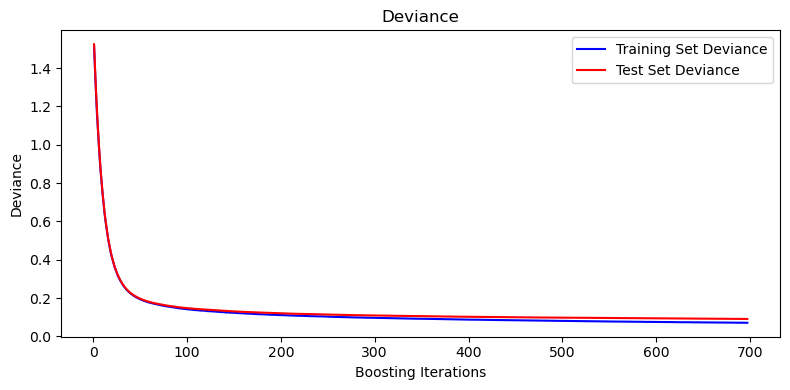

In [23]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## cross validation

In [24]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [25]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [26]:
#%%timeit -n 1 -r 1
scores = []
print(X.shape,y.shape)
for train_index, test_index in kfold.split(X=scaled,y=y):
    print(len(train_index),train_index,len(test_index),test_index)   
    X_train, X_test = scaled[train_index], scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = GradientBoostingRegressor(**params_1st_pass)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

(379436, 64) (379436,)
284577 [     1      3      4 ... 379431 379432 379434] 94859 [     0      2      7 ... 379422 379433 379435]
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.5187           0.1338           75.37m
         2           1.3902           0.0986           77.49m
         3           1.2775           0.1080           76.79m
         4           1.1729           0.0822           75.34m
         5           1.0906           0.1259           74.44m
         6           1.0048           0.0668           73.70m
         7           0.9276           0.0585           73.14m
         8           0.8597           0.0708           72.80m
         9           0.8028           0.0829           72.46m
        10           0.7424           0.0316           72.52m
        20           0.4122           0.0208           72.31m
        30           0.2801           0.0047           71.13m
        40           0.2227           0.0023           69.74m

KeyboardInterrupt: 

In [ ]:
display_scores(np.sqrt(scores))

## parameter tuning

In [27]:
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)

In [28]:
#%%timeit -n 1 -r 1
params={
#'alpha': uniform(0.5,0.5),
'learning_rate': uniform(0.005,0.045),
'loss': ['squared_error','absolute_error'],
'max_depth': randint(4,10),
'n_estimators': randint(500,1100),
'subsample': uniform(0.1,0.5),
'validation_fraction': uniform(0.1,0.4),
}
#'criterion': 'friedman_mse',
#'ccp_alpha': 0.0,
#'init': None,
#'max_features': None,
#'max_leaf_nodes': None,
#'min_impurity_decrease': 0.0,
#'min_samples_leaf': 1,
#'min_samples_split': 2,
#X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.3,random_state=42)
#'n_iter_no_change': None,
#'random_state': None,
#'min_weight_fraction_leaf': 0.0,
#'tol': 0.001,
#'validation_fraction': 0.3333333,
#'verbose': 0,
#'warm_start': False

model=GradientBoostingRegressor()
search=RandomizedSearchCV(model,param_distributions=params,random_state=42,n_iter=100,cv=3,n_jobs=12, verbose=4,return_train_score=True)
search.fit(X_train, y_train)
#n_iter=100 >>> 9m 43s
#14.00 - 14.40 for niter=10,cv=3
#16.00 - 17.10 niter=20
#18.15 - 20.20 niter=100

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=31540) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/home/sat/anaconda3/envs/py312scikitlearn/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n


KeyboardInterrupt: 

In [ ]:
be=search.best_estimator_
be.get_params()

In [ ]:
search.cv_results_['params'][search.best_index_]

In [ ]:
search.best_params_

In [ ]:
#%%timeit -n 1 -r 1
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.33333,random_state=42)
best_params=search.best_estimator_.get_params()
reg=GradientBoostingRegressor(**best_params)
reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=None,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_ylim(0,13)
axs[0].set_xlim(0,13)
axs[0].set_xticks(range(0,14,2))
axs[0].set_yticks(range(0,14,2))
PED.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=None,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_xlim(0,13)
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()
print(r2_score(y_pred=y_pred,y_true=y_test))

In [ ]:
df_results=pd.DataFrame(data=search.cv_results_)
df_results.sort_values(by='rank_test_score')

In [ ]:
import time
import pickle
with open('reg_best_params.pkl','wb') as f:
    pickle.dump(reg,f)

In [ ]:
import datetime
now = datetime.datetime.now()
now